In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import random

In [10]:
data=pd.read_json("train.json")

In [11]:
data

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",low,40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",low,40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",medium,40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",low,40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th


In [12]:
random.seed(0)
train_data=data.sample(n=data.shape[0]*7/10)
test_data=data.drop(train_data.index)

In [13]:
#bathroom, bedroom, created, latitude, longtitude, manager_id, price 
#dependent variable: interest_level
#NLP: description/features
%matplotlib inline

In [14]:
#1.multinomial logistic regression on bathrooms, bedrooms price
x_train=train_data.loc[:,['bathrooms','bedrooms','price']]
y_train=train_data.loc[:,'interest_level']
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train, y_train)
y_predict=lr.predict(x_train)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_predict)
#training dataset got 69.37% accuracy

0.69284432351068137

In [16]:
x_test=test_data.loc[:,['bathrooms','bedrooms','price']]
y_test=test_data.loc[:,'interest_level']
accuracy_score(y_test,lr.predict(x_test))
#69.3435% accuracy on test set

0.69296231257598273

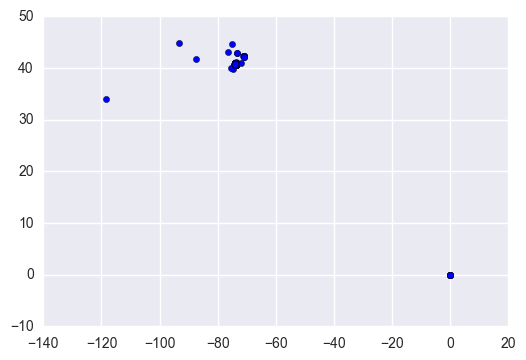

In [19]:
#2. position density on given long and lat
x_axis=train_data.loc[:,'longitude']
y_axis=train_data.loc[:,'latitude']
interest=train_data.loc[:,'interest_level']
plt.scatter(x_axis,y_axis)
plt.show()
##concentrate but outliers

In [21]:
#function to remove outliers
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

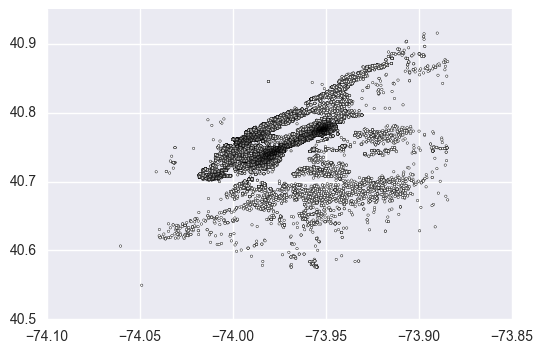

In [22]:
from scipy.stats import gaussian_kde
x_filtered=x_axis[~is_outlier(x_axis)]
y_filtered=y_axis[x_filtered.index]
xy = np.vstack([x_filtered,y_filtered])
z = gaussian_kde(xy)(xy)
plt.scatter(x_filtered,y_filtered,c=z,s=3)
plt.show()

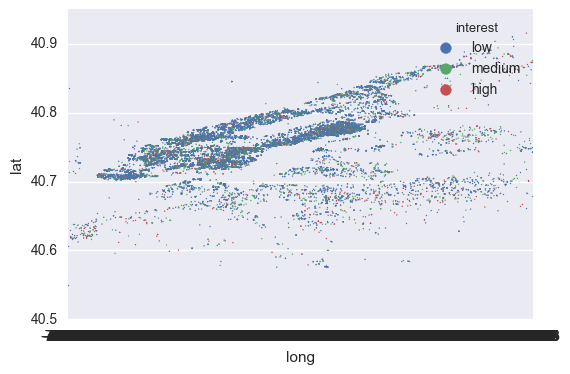

In [21]:
###plot with category
import seaborn as sns
dict_temp={'long':x_filtered,'lat':y_filtered,'interest':interest[x_filtered.index]}

sns.swarmplot(x="long", y="lat", data=pd.DataFrame(dict_temp), hue="interest", size=1)

In [23]:
#if using gaussian density as an argument for position
#using the shortest distance on long and lat to find the density new X_test
dic={'longitude':x_filtered,'latitude':y_filtered,'density':z}
searching_set=pd.DataFrame(dic)

In [24]:
searching_set

,density,latitude,longitude
94156,67.277129,40.8366,-73.9416
7951,324.891614,40.7715,-73.9490
79019,48.065201,40.8198,-73.9578
70722,295.038090,40.7664,-73.9863
88718,379.040460,40.7760,-73.9556
115434,208.108514,40.7351,-73.9755
74564,31.938784,40.7172,-73.9545
48270,159.419029,40.7199,-73.9829
75220,296.084648,40.7539,-73.9686
57818,296.448642,40.7057,-74.0085


In [25]:
#find the closest point and get its density as new density for new point
import math
def find_density(lat,lo_g,search_set):
    n=search_set.shape[0]
    dis=10000
    j=0
    for i in range(n):
        dis_2=math.sqrt((search_set.iloc[i,1]-lat)**2+(search_set.iloc[i,2]-lo_g)**2)
        if dis_2<dis:
            j=i
            dis=dis_2
    return search_set.iloc[j,0]
    

In [26]:
lat_test=test_data.loc[:,'latitude']
lo_g_test=test_data.loc[:,'longitude']

In [ ]:
###too slow###
density=map(lambda x,y:find_density(x,y,searching_set),lat_test,lo_g_test)

In [16]:
#3.created time
#from lastest to earliest, lastest should have more interest
single_time=train_data.loc[:,['created','interest_level']]

In [17]:
import time
sor=sorted(single_time['created'],key=lambda x: time.mktime(time.strptime(x,"%Y-%m-%d %H:%M:%S")),reverse=True)

In [18]:
single_time['date_index']=0
for i in range(single_time.shape[0]):
    single_time.date_index.iloc[i]=sor.index(single_time.created.iloc[i])

/Users/gaoxu/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
single_time.to_csv("date_index.csv")

In [2]:
single_time=pd.read_csv("date_index.csv")

In [3]:
single_time

,Unnamed: 0,created,interest_level,date_index
0,93483,2016-04-26 03:28:41,medium,24962
1,77126,2016-05-21 03:27:11,low,14804
2,101404,2016-04-20 01:28:51,medium,27285
3,26506,2016-06-16 08:09:48,medium,4842
4,65065,2016-05-28 01:42:50,low,12467
5,5681,2016-06-09 04:03:17,low,8243
6,30620,2016-06-18 03:14:03,low,4237
7,72377,2016-05-09 02:52:10,low,20062
8,29388,2016-06-24 04:58:31,low,2113
9,5688,2016-06-14 02:26:12,low,6173


In [4]:
#4. date ===> month, to see monthly 
single_time['month']=map(lambda x:x[5:7],single_time.created)

In [5]:
dic1={'high':3,'medium':2,'low':1}
single_time['interest_NUM']=map(lambda x:dic1[x],single_time.interest_level)

In [6]:
mi=single_time.loc[:,['month','interest_NUM']]
mi.groupby(by='month').mean()
####only have 4, 5 ,6, three months totally

,interest_NUM
month,
04,1.387264
05,1.386282
06,1.380584
